<a href="https://colab.research.google.com/github/K-Rajashri/Mini-Project/blob/main/Minor_Project(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 145 µs (started: 2021-05-05 17:50:23 +00:00)


In [3]:
#PREPROCESSING
#1.resizing
#2.flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread #reading an image
from skimage.transform import resize


target = []
images = []
flat_data = []

DATADIR ='/content/gdrive/MyDrive/Images'
CATEGORIES= ["aeroplane","car","ship"]

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(np.ndarray.flatten(img_resized))
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 45.7 s (started: 2021-05-05 17:50:39 +00:00)


In [4]:
np.unique(target,return_counts=True)

(array([0, 1, 2]), array([30, 30, 30]))

time: 3.84 ms (started: 2021-05-05 17:51:46 +00:00)


In [5]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 5.24 ms (started: 2021-05-05 17:52:02 +00:00)


In [6]:
flat_data[0]

array([1., 1., 1., ..., 1., 1., 1.])

time: 3.8 ms (started: 2021-05-05 17:52:21 +00:00)


In [7]:
len(flat_data[0])

67500

time: 3.84 ms (started: 2021-05-05 17:52:39 +00:00)


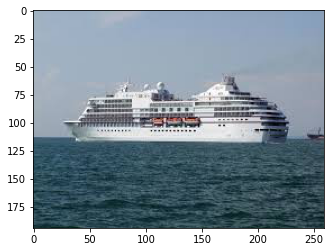

time: 210 ms (started: 2021-05-05 17:52:59 +00:00)


In [8]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)#Label Encoding the values
  path = os.path.join(DATADIR,category)#create path to use all the images
for img in os.listdir(path):
  img_array=imread(os.path.join(path,img))
  plt.imshow(img_array)
  break

<BarContainer object of 3 artists>

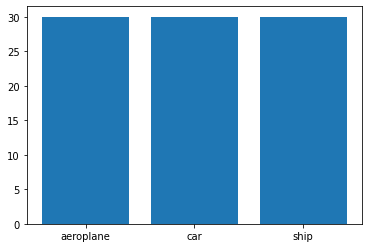

time: 123 ms (started: 2021-05-05 17:53:18 +00:00)


In [9]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)


In [10]:
np.unique(target,return_counts=True)

(array([0, 1, 2]), array([30, 30, 30]))

time: 3.78 ms (started: 2021-05-05 17:53:39 +00:00)


In [11]:
#Split data into Training and testing
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)

time: 244 ms (started: 2021-05-05 17:53:54 +00:00)


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm


param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
              ]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 21s (started: 2021-05-05 17:54:09 +00:00)


In [13]:
y_pred=clf.predict(x_test)
y_pred

array([1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2,
       2, 2, 1, 2, 1])

time: 136 ms (started: 2021-05-05 17:56:01 +00:00)


In [14]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 3.04 ms (started: 2021-05-05 17:56:19 +00:00)


In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 784 µs (started: 2021-05-05 17:56:32 +00:00)


In [16]:
accuracy_score(y_pred,y_test)

0.6666666666666666

time: 6.9 ms (started: 2021-05-05 17:56:50 +00:00)


In [17]:
confusion_matrix(y_pred,y_test)

array([[3, 0, 1],
       [1, 9, 1],
       [4, 2, 6]])

time: 4.94 ms (started: 2021-05-05 17:57:08 +00:00)


In [18]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open("img_model.p","wb"))

time: 29.6 ms (started: 2021-05-05 17:57:26 +00:00)


In [19]:
model=pickle.load(open('img_model.p','rb'))

time: 21 ms (started: 2021-05-05 17:57:41 +00:00)


Enter your URLhttps://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2022-chevrolet-corvette-z06-1607016574.jpg?crop=0.737xw:0.738xh;0.181xw,0.218xh&resize=640:*
(427, 640, 3)
PREDICTED OUTPUT: car


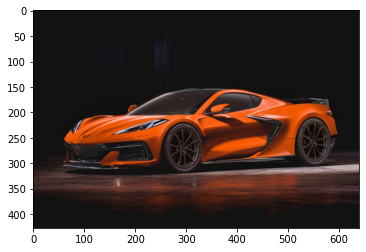

time: 13.6 s (started: 2021-05-05 17:57:58 +00:00)


In [20]:
import matplotlib.pyplot as plt
flat_data = []
url=input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f"PREDICTED OUTPUT: {y_out}")

In [24]:
!pip install streamlit 
!pip install pyngrok        
from pyngrok import ngrok

time: 5.38 s (started: 2021-05-05 18:00:28 +00:00)


In [36]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image

st.set_option("deprecation.showfileUploaderEncoding",False)
st.title("Image Classifier")
st.text("Upload the Image")

model = pickle.load(open("img_model.p","rb"))

uploaded_file = st.file_uploader("Choose an image", type= "jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption= "Uploaded Image")

  if st.button("Predict"):
    CATEGORIES= ["aeroplane","car","ship"]

    
    st.write("Result")
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    plt.imshow(img)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f"PREDICTED OUTPUT: {y_out}")

Overwriting app.py
time: 11.9 ms (started: 2021-05-05 18:22:23 +00:00)


In [ ]:
!nohup streamlit run app.py &

url = ngrok.connect(port= "8501")
url